<a href="https://www.kaggle.com/code/arshadshaikh070121/simplelinearregression?scriptVersionId=202300685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
#Importing the datatset
data = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
data = data.drop(['Unnamed: 0'], axis=1) # Dropping 1st Column
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
data['Salary'] = data['Salary']/1000. # Converting the salary
data.columns = ['Experience (years)', 'Salary (1000 $)']

In [7]:
data.head()

,Experience (years),Salary (1000 $)
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892


In [8]:
data.describe()

,Experience (years),Salary (1000 $)
count,30.000000,30.00000
mean,5.413333,76.00400
std,2.837888,27.41443
min,1.200000,37.73200
25%,3.300000,56.72175
50%,4.800000,65.23800
75%,7.800000,100.54575
max,10.600000,122.39200


In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

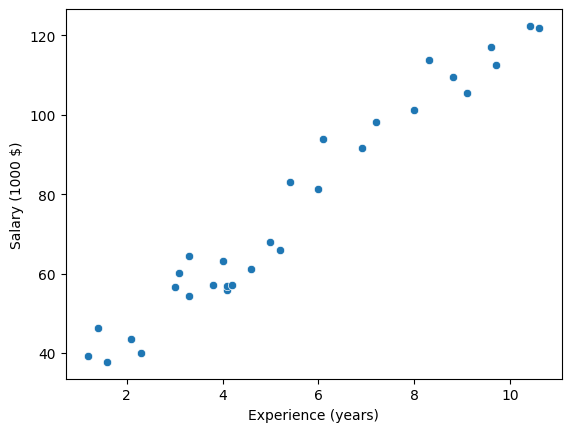

In [10]:
# Plotting the scatter plot between the experience and salary
sns.scatterplot(data=data, x="Experience (years)", y="Salary (1000 $)")
plt.show()

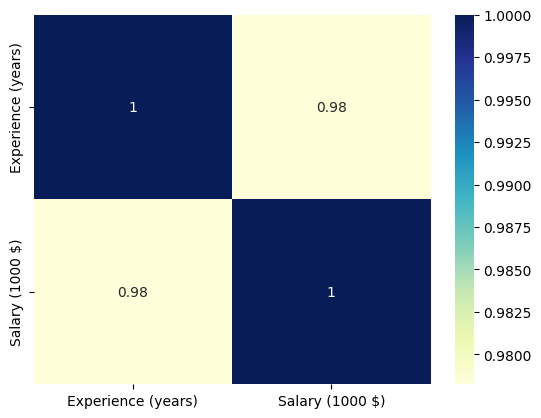

In [11]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### Model building using Statsmodel

In [12]:
X = data['Experience (years)']
y = data['Salary (1000 $)']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.head()

17     5.4
22     8.0
11     4.1
4      2.3
29    10.6
Name: Experience (years), dtype: float64

In [15]:
y_train.head()

17     83.089
22    101.303
11     55.795
4      39.892
29    121.873
Name: Salary (1000 $), dtype: float64

In [16]:
import statsmodels.api as sm

In [17]:
X_train_sm = sm.add_constant(X_train)
linReg = sm.OLS(y_train,X_train_sm).fit()

In [18]:
linReg.params

const                 24.230767
Experience (years)     9.731204
dtype: float64

In [19]:
print(linReg.summary())

                            OLS Regression Results                            
Dep. Variable:        Salary (1000 $)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           9.91e-14
Time:                        13:32:10   Log-Likelihood:                -66.742
No. Observations:                  21   AIC:                             137.5
Df Residuals:                      19   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 24.2308      2

The OLS summary depicts the strong relationship between both the variables.
1. The R-Squared  and Adjusted R-Squared are high indicating the strong relationship between the variables.
2. The model is statistically significant because of the strong F-statistic and the correspondingly small p-value. This indicates that there is a strong correlation between income and the predictor.


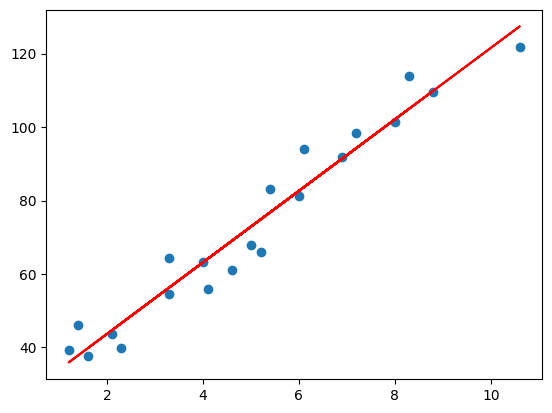

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 24.230 + 9.731 * X_train, color='red')
plt.show()

In [21]:
y_train_pred = linReg.predict(X_train_sm)
res = (y_train - y_train_pred)

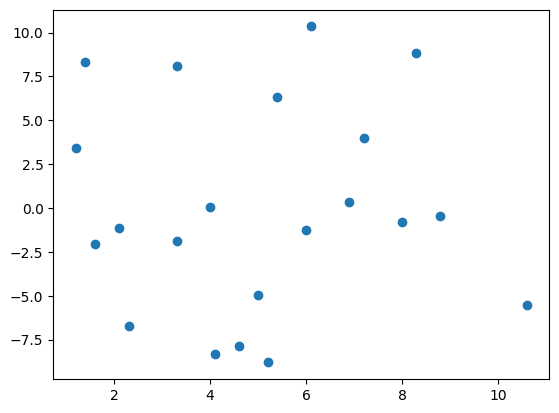

In [22]:
plt.scatter(X_train,res)
plt.show()

In [23]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = linReg.predict(X_test_sm)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.5054790021761475

In [26]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9627668685473266

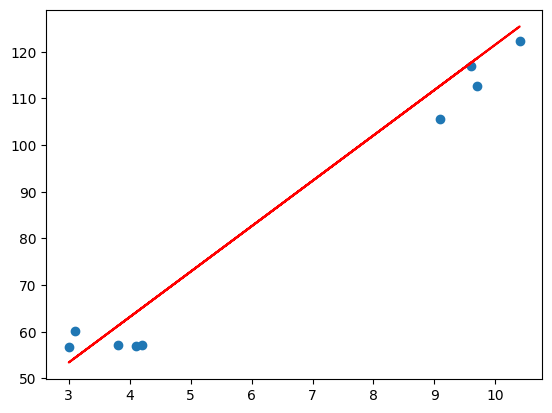

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 24.230 + 9.731 * X_test, 'r')
plt.show()

##### Model building using Sklearn

In [28]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [30]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(21, 1)
(21,)
(9, 1)
(9,)


In [31]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

24.230767402330336
[9.73120384]


The equation we get is the same as what we got before

In [33]:
y_train_pred = lm.predict(X_train_lm)

In [34]:
y_test_pred = lm.predict(X_test_lm)

In [35]:
r2 = r2_score(y_true=y_train,y_pred= y_train_pred)
r2

0.9489148127897334

In [36]:
r2 = r2_score(y_true=y_test,y_pred= y_test_pred)
r2

0.9627668685473265

In [37]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.97412259]
 [0.97412259 1.        ]]


In [38]:
corrs[0,1] ** 2 # Calculating the Pearson R

0.948914812789734